In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns 
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.tree import DecisionTreeRegressor
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse 
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_score, KFold
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# loading the data

In [3]:
#pip install kaggle

In [4]:
#!kaggle --version

In [5]:
#!kaggle competitions download -c ml-night-gdsc-fst

In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('Submission Sample.csv')
train = train.set_index('campaign_id')
test = test.set_index('campaign_id')

In [7]:
train.head()

,chain_id,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,budget
campaign_id,,,,,,,,,,,,,
8963,12,2019-07-21,2019-07-24,banner,DESKTOP,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177
11875,11,2020-09-01,2020-09-05,butterfly,DESKTOP,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250
25899,11,2020-10-29,2020-11-24,butterfly,DESKTOP,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865
25458,10,2020-12-09,2020-12-15,banner,DESKTOP,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429
35293,12,2019-11-14,2019-12-26,banner,DESKTOP,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937


In [8]:
train.describe()

,chain_id,height,width,days,start_day,end_day,shop,budget
count,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000,3988.000000
mean,10.916249,357.299147,656.832999,23.998495,3.062688,4.230441,0.007021,16469.052835
std,1.454780,111.035855,288.019370,27.788634,1.891351,2.181921,0.083508,29185.986940
min,7.000000,15.000000,240.000000,2.000000,1.000000,1.000000,0.000000,779.658020
25%,11.000000,298.000000,398.000000,8.000000,1.000000,2.000000,0.000000,5251.781250
50%,11.000000,350.000000,574.000000,16.000000,3.000000,4.000000,0.000000,8889.082855
75%,12.000000,472.000000,995.000000,29.000000,4.000000,6.000000,0.000000,12610.314751
max,12.000000,1080.000000,2560.000000,298.000000,7.000000,7.000000,1.000000,448000.000000


## Data Understanding

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3988 entries, 8963 to 8636
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   chain_id    3988 non-null   int64  
 1   start_date  3988 non-null   object 
 2   end_date    3988 non-null   object 
 3   format      3988 non-null   object 
 4   device      3988 non-null   object 
 5   height      3988 non-null   float64
 6   width       3988 non-null   float64
 7   iremoteid   3988 non-null   object 
 8   days        3988 non-null   float64
 9   start_day   3988 non-null   float64
 10  end_day     3988 non-null   float64
 11  shop        3988 non-null   float64
 12  budget      3988 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 436.2+ KB


In [10]:
train['start_date']=pd.to_datetime(train['start_date'])
train['end_date']=pd.to_datetime(train['end_date'])

In [11]:
train['start_date:year'] = train['start_date'].dt.year
train['start_date:month'] = train['start_date'].dt.month
train['start_date:day'] = train['start_date'].dt.day

In [12]:
train['end_date:year'] = train['end_date'].dt.year
train['end_date:month'] = train['end_date'].dt.month
train['end_date:day'] = train['end_date'].dt.day

In [13]:
test['start_date']=pd.to_datetime(test['start_date'])
test['end_date']=pd.to_datetime(test['end_date'])

In [14]:
test['start_date:year'] = test['start_date'].dt.year
test['start_date:month'] = test['start_date'].dt.month
test['start_date:day'] = test['start_date'].dt.day

In [15]:
test['end_date:year'] = test['end_date'].dt.year
test['end_date:month'] = test['end_date'].dt.month
test['end_date:day'] = test['end_date'].dt.day

### Handeling Categorical Variables 

In [16]:
train['chain_id'].value_counts()

12    1738
11    1342
10     520
7      388
Name: chain_id, dtype: int64

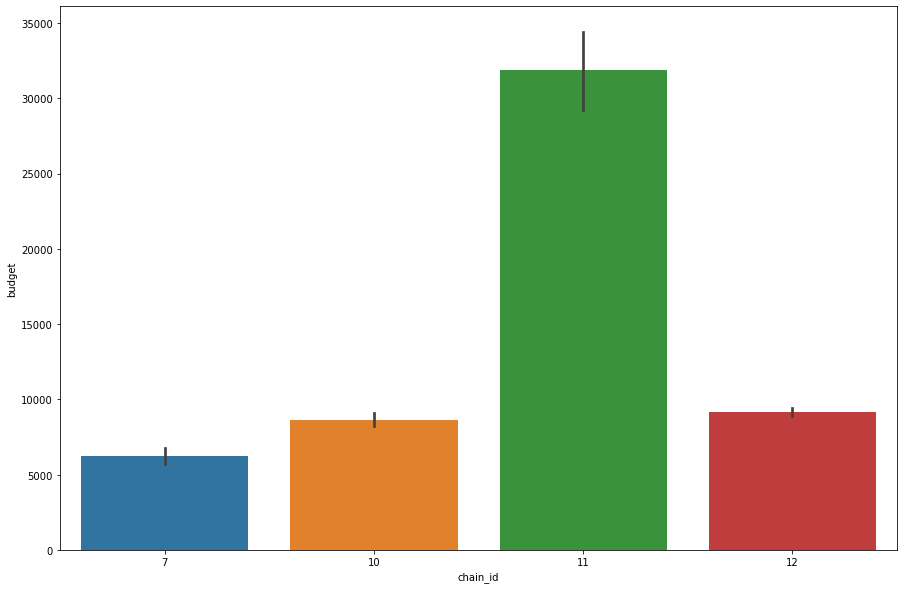

In [17]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=train['chain_id'],y=train['budget'],data=train)
plt.show()

In [18]:
dummies = pd.get_dummies(train['chain_id'], prefix='cat',drop_first=True)
train =pd.concat([train, dummies], axis=1)
train.drop('chain_id',axis=1,inplace=True)
train.head()

,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,budget,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12
campaign_id,,,,,,,,,,,,,,,,,,,,,
8963,2019-07-21,2019-07-24,banner,DESKTOP,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177,2019,7,21,2019,7,24,0,0,1
11875,2020-09-01,2020-09-05,butterfly,DESKTOP,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250,2020,9,1,2020,9,5,0,1,0
25899,2020-10-29,2020-11-24,butterfly,DESKTOP,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865,2020,10,29,2020,11,24,0,1,0
25458,2020-12-09,2020-12-15,banner,DESKTOP,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429,2020,12,9,2020,12,15,1,0,0
35293,2019-11-14,2019-12-26,banner,DESKTOP,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937,2019,11,14,2019,12,26,0,0,1


In [19]:
dummies = pd.get_dummies(test['chain_id'], prefix='cat',drop_first=True)
test =pd.concat([test, dummies], axis=1)
test.drop('chain_id',axis=1,inplace=True)
test.head()

,start_date,end_date,format,device,height,width,iremoteid,days,start_day,end_day,shop,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12
campaign_id,,,,,,,,,,,,,,,,,,,,
126,2020-08-28,2020-09-01,butterfly,DESKTOP,420.0,574.0,"['C83953', 'C83957']",6.0,5.0,2.0,0.0,2020,8,28,2020,9,1,1,0,0
29125,2019-07-15,2019-08-10,butterfly,DESKTOP,420.0,574.0,['C31394'],28.0,1.0,6.0,0.0,2019,7,15,2019,8,10,1,0,0
740,2020-06-30,2020-08-31,butterfly,DESKTOP,298.0,398.0,"['C68608', 'C68615', 'C68622']",64.0,2.0,1.0,0.0,2020,6,30,2020,8,31,0,0,1
3911,2020-07-22,2020-08-03,butterfly,DESKTOP,420.0,574.0,['C75293'],14.0,3.0,1.0,0.0,2020,7,22,2020,8,3,1,0,0
33566,2021-06-01,2021-06-11,tg,DESKTOP,298.0,796.0,['C145882'],12.0,2.0,5.0,0.0,2021,6,1,2021,6,11,0,0,1


In [20]:
train['format'].value_counts()

butterfly     2152
tg             620
showcase       568
banner         419
stoprayon      172
shop            28
pmp             16
lucky cart      11
highco           2
Name: format, dtype: int64

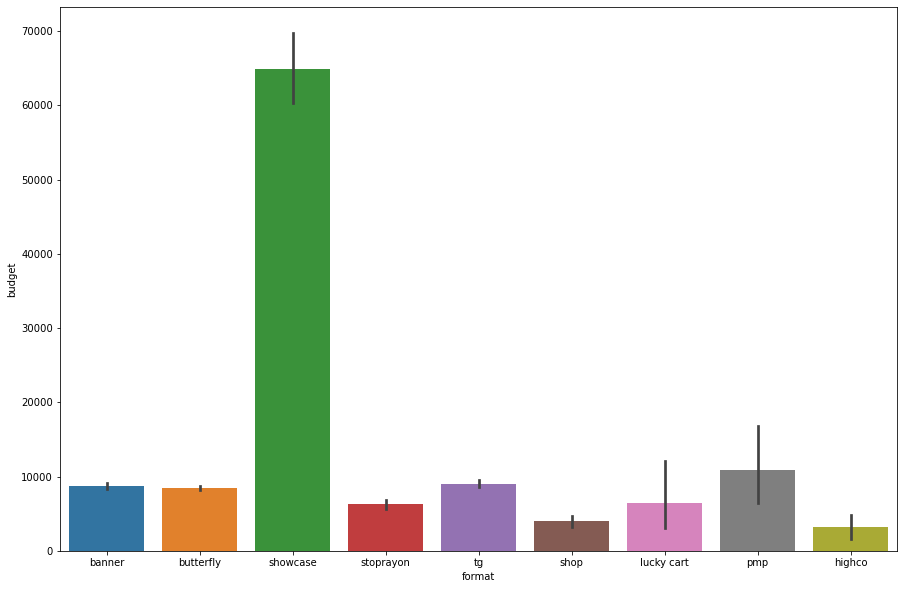

In [21]:
fig = plt.figure(figsize=(15,10))
sns.barplot(x=train['format'],y=train['budget'],data=train)
plt.show()

In [22]:
dummies = pd.get_dummies(train['format'], prefix='Category',drop_first=True)
train =pd.concat([train, dummies], axis=1)
train.drop('format',axis=1,inplace=True)
train.drop('device',axis=1,inplace=True)
train

,start_date,end_date,height,width,iremoteid,days,start_day,end_day,shop,budget,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
8963,2019-07-21,2019-07-24,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177,2019,7,21,2019,7,24,0,0,1,0,0,0,0,0,0,0,0
11875,2020-09-01,2020-09-05,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250,2020,9,1,2020,9,5,0,1,0,1,0,0,0,0,0,0,0
25899,2020-10-29,2020-11-24,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865,2020,10,29,2020,11,24,0,1,0,1,0,0,0,0,0,0,0
25458,2020-12-09,2020-12-15,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429,2020,12,9,2020,12,15,1,0,0,0,0,0,0,0,0,0,0
35293,2019-11-14,2019-12-26,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937,2019,11,14,2019,12,26,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,2021-09-27,2021-10-01,486.0,531.0,['C179459'],6.0,1.0,5.0,0.0,4036.691162,2021,9,27,2021,10,1,0,1,0,1,0,0,0,0,0,0,0
22449,2020-11-01,2020-11-04,394.0,576.0,['103287'],5.0,7.0,3.0,0.0,2332.705994,2020,11,1,2020,11,4,0,0,0,1,0,0,0,0,0,0,0
28382,2021-01-13,2021-04-01,486.0,273.0,['C119433'],80.0,3.0,4.0,0.0,10850.689697,2021,1,13,2021,4,1,0,1,0,1,0,0,0,0,0,0,0


In [23]:
dummies = pd.get_dummies(test['format'], prefix='Category',drop_first=True)
test =pd.concat([test, dummies], axis=1)
test.drop('format',axis=1,inplace=True)
test.drop('device',axis=1,inplace=True)
test.head()

,start_date,end_date,height,width,iremoteid,days,start_day,end_day,shop,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,,,,,
126,2020-08-28,2020-09-01,420.0,574.0,"['C83953', 'C83957']",6.0,5.0,2.0,0.0,2020,8,28,2020,9,1,1,0,0,1,0,0,0,0,0,0,0
29125,2019-07-15,2019-08-10,420.0,574.0,['C31394'],28.0,1.0,6.0,0.0,2019,7,15,2019,8,10,1,0,0,1,0,0,0,0,0,0,0
740,2020-06-30,2020-08-31,298.0,398.0,"['C68608', 'C68615', 'C68622']",64.0,2.0,1.0,0.0,2020,6,30,2020,8,31,0,0,1,1,0,0,0,0,0,0,0
3911,2020-07-22,2020-08-03,420.0,574.0,['C75293'],14.0,3.0,1.0,0.0,2020,7,22,2020,8,3,1,0,0,1,0,0,0,0,0,0,0
33566,2021-06-01,2021-06-11,298.0,796.0,['C145882'],12.0,2.0,5.0,0.0,2021,6,1,2021,6,11,0,0,1,0,0,0,0,0,0,0,1


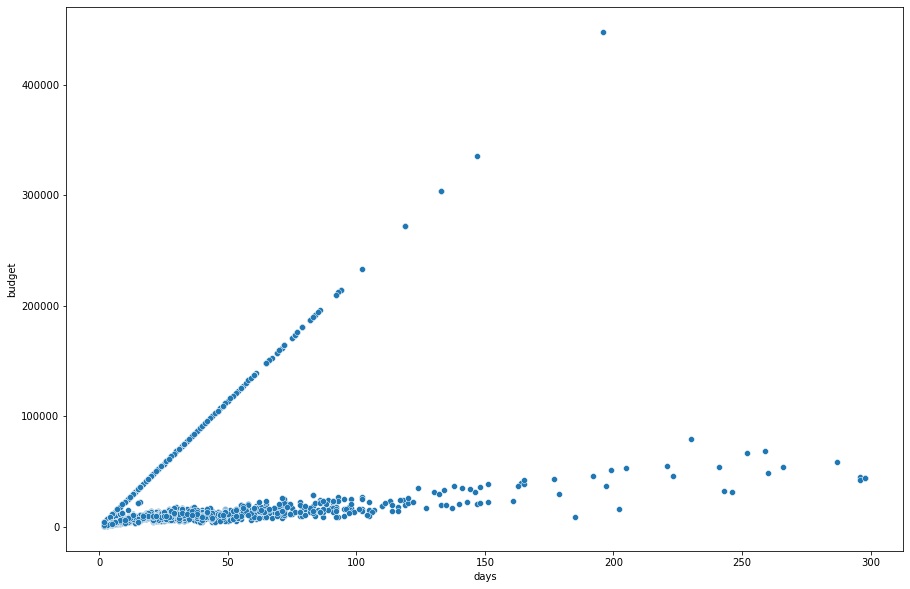

In [24]:
fig = plt.figure(figsize=(15,10))
sns.scatterplot(x='days',y='budget',data=train)
plt.show()

In [25]:
train['start_day'].value_counts()

1.0    1043
2.0     889
3.0     654
4.0     453
5.0     374
7.0     299
6.0     276
Name: start_day, dtype: int64

In [26]:
train['end_day'].value_counts()

7.0    927
1.0    634
6.0    547
2.0    509
3.0    478
4.0    451
5.0    442
Name: end_day, dtype: int64

In [27]:
train['shop'].value_counts()

0.0    3960
1.0      28
Name: shop, dtype: int64

# data processing

### Smote

In [28]:
col = train['shop']
# Convert the column to a numpy array
col = col.values.reshape(-1, 1)

In [29]:
smote = SMOTE(sampling_strategy='minority')
#col_resampled, y_resampled = smote.fit_resample(col, train['budget'])

In [30]:
##data_resampled = data.copy()
#data_resampled[column_name] = col_resampled.flatten()

# Correlations

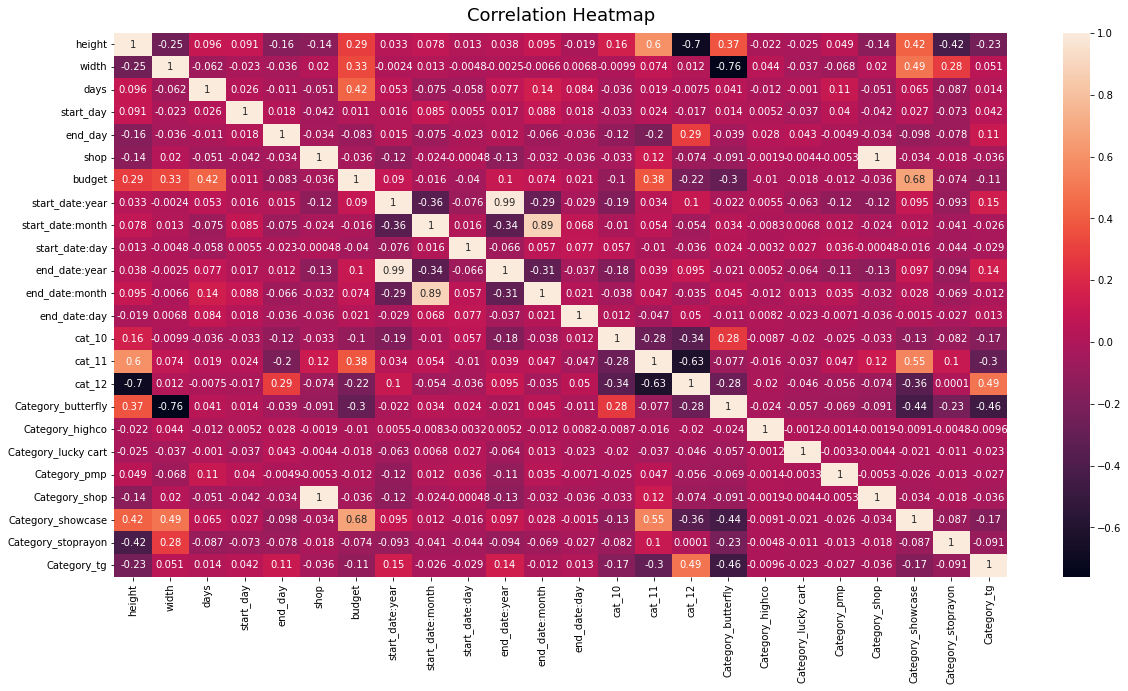

In [31]:
# Visualizing the collelations between all variables of the data.
plt.figure(1 , figsize = (20,10))
cor = sns.heatmap(train.corr(), annot = True)
cor.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.show()

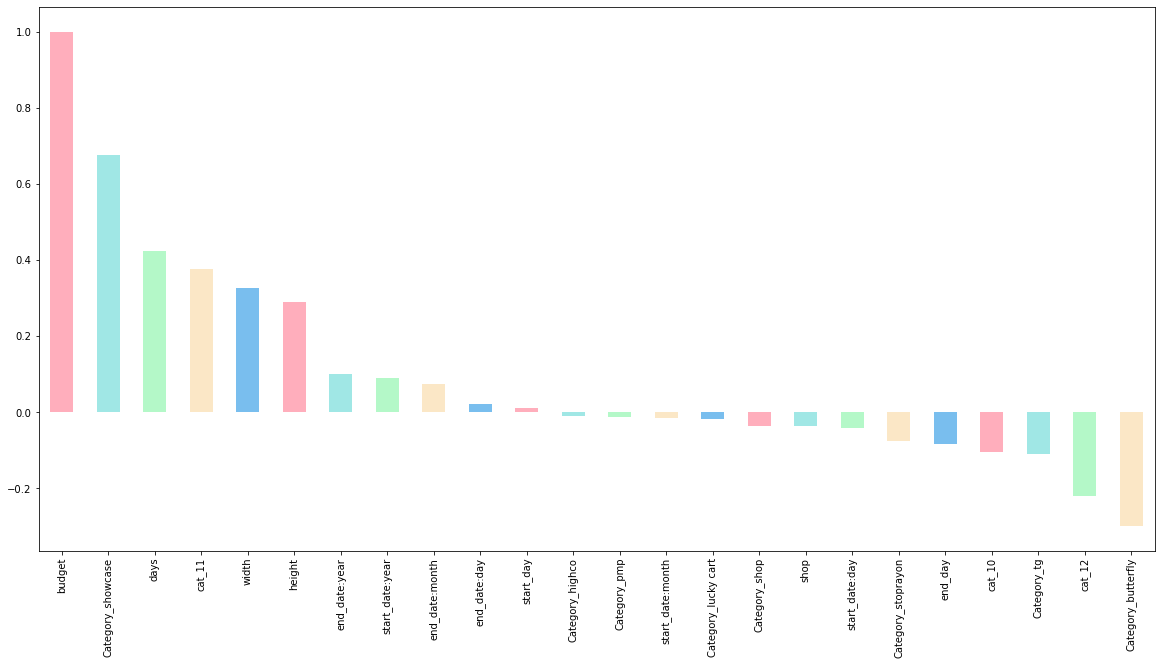

In [32]:
plt.figure(1 , figsize = (20,10))
train.corr()['budget'].sort_values(ascending = False).plot(kind='bar', color=['#FFAEBC','#A0E7E5', '#B4F8C8', '#FBE7C6', '#79BEEE'])
plt.show()

In [33]:
#pd.plotting.scatter_matrix(train, alpha=0.5, figsize=(30, 22), diagonal='kde')
#plt.show()

### Feature Distributions

In [34]:
train.head()

,start_date,end_date,height,width,iremoteid,days,start_day,end_day,shop,budget,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
8963,2019-07-21,2019-07-24,200.0,995.0,['31834'],5.0,7.0,3.0,0.0,3579.344177,2019,7,21,2019,7,24,0,0,1,0,0,0,0,0,0,0,0
11875,2020-09-01,2020-09-05,486.0,278.0,['C75204'],6.0,2.0,6.0,0.0,5251.781250,2020,9,1,2020,9,5,0,1,0,1,0,0,0,0,0,0,0
25899,2020-10-29,2020-11-24,488.0,265.0,['CB9645'],28.0,4.0,2.0,0.0,9814.411865,2020,10,29,2020,11,24,0,1,0,1,0,0,0,0,0,0,0
25458,2020-12-09,2020-12-15,150.0,1200.0,['C111392'],8.0,3.0,2.0,0.0,11428.571429,2020,12,9,2020,12,15,1,0,0,0,0,0,0,0,0,0,0
35293,2019-11-14,2019-12-26,200.0,995.0,['34341'],44.0,4.0,4.0,0.0,9328.322937,2019,11,14,2019,12,26,0,0,1,0,0,0,0,0,0,0,0


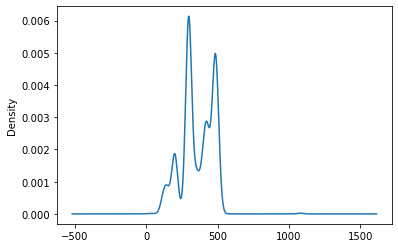

In [35]:
train['height'].plot(kind='kde')
plt.show()

In [36]:
#train['height'],_ = pd.Series(stats.boxcox(train['height']))
#test['height'],_ = pd.Series(stats.boxcox(test['height']))

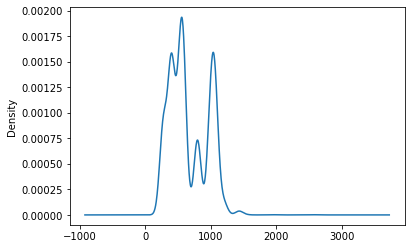

In [37]:
train['width'].plot(kind='kde')
plt.show()

In [38]:
#train['width'],_ = pd.Series(stats.boxcox(train['width']))
#test['width'],_ = pd.Series(stats.boxcox(test['width']))

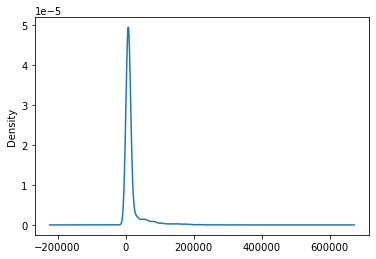

In [39]:
train['budget'].plot(kind='kde')
plt.show()

In [40]:
#train['budget'],_ = pd.Series(stats.boxcox(train['budget']))

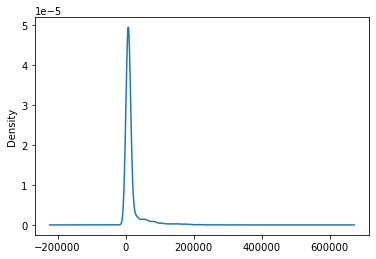

In [41]:
train['budget'].plot(kind='kde')
plt.show()

# creating the X and y 

In [42]:
y = train[['budget']]

In [43]:
x = train.drop(['start_date','end_date','iremoteid','shop','budget'],axis=1)
test = test.drop(['start_date','end_date','iremoteid','shop'],axis=1)

In [44]:
X_train , X_test , y_train ,y_test = train_test_split(x,y,test_size = 0.1,random_state =4)

In [45]:
test.head()

,height,width,days,start_day,end_day,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,
126,420.0,574.0,6.0,5.0,2.0,2020,8,28,2020,9,1,1,0,0,1,0,0,0,0,0,0,0
29125,420.0,574.0,28.0,1.0,6.0,2019,7,15,2019,8,10,1,0,0,1,0,0,0,0,0,0,0
740,298.0,398.0,64.0,2.0,1.0,2020,6,30,2020,8,31,0,0,1,1,0,0,0,0,0,0,0
3911,420.0,574.0,14.0,3.0,1.0,2020,7,22,2020,8,3,1,0,0,1,0,0,0,0,0,0,0
33566,298.0,796.0,12.0,2.0,5.0,2021,6,1,2021,6,11,0,0,1,0,0,0,0,0,0,0,1


In [46]:
x.head()

,height,width,days,start_day,end_day,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,
8963,200.0,995.0,5.0,7.0,3.0,2019,7,21,2019,7,24,0,0,1,0,0,0,0,0,0,0,0
11875,486.0,278.0,6.0,2.0,6.0,2020,9,1,2020,9,5,0,1,0,1,0,0,0,0,0,0,0
25899,488.0,265.0,28.0,4.0,2.0,2020,10,29,2020,11,24,0,1,0,1,0,0,0,0,0,0,0
25458,150.0,1200.0,8.0,3.0,2.0,2020,12,9,2020,12,15,1,0,0,0,0,0,0,0,0,0,0
35293,200.0,995.0,44.0,4.0,4.0,2019,11,14,2019,12,26,0,0,1,0,0,0,0,0,0,0,0


In [47]:
y.head()

,budget
campaign_id,
8963,3579.344177
11875,5251.781250
25899,9814.411865
25458,11428.571429
35293,9328.322937


# creating the model

In [48]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Cross validation

In [49]:
#KFold cross-validation with 10 folds 
kf = KFold(n_splits=10,shuffle=True,random_state=7)
cv_results1 =cross_val_score(model,x,y,cv=kf,scoring='neg_root_mean_squared_error')

In [50]:
print(cv_results1)

[-1454.23335034 -1357.7868101  -1087.96481359 -6933.13783961
 -1094.72661326 -1655.61762377 -2207.66379092 -1339.37454153
  -861.6221993   -605.70515483]


In [51]:
print(np.mean(cv_results1), np.std(cv_results1))#

-1859.7832737257856 1741.8088398101384


In [52]:
print(np.quantile(cv_results1,[0.025,0.975]))

[-5869.90617866  -663.28648983]


# evaluating the model 

In [53]:
# note that the lower the MSE the better 
y_preds = model.predict(X_test)
rmse = mse(y_test,y_preds)**(1/2)
print(rmse)

738.6117432274872


In [54]:
y_train.head()

,budget
campaign_id,
1015,10527.912598
27482,14429.484894
16809,14385.509277
33383,12151.500183
799,7752.183289


In [55]:
y_test.head()

,budget
campaign_id,
8952,5346.669922
13576,1333.207764
681,10789.131958
29777,57142.857143
661,9982.714539


### Features Importance

In [56]:
print(model.feature_importances_)

[1.4163446e-04 3.0638045e-04 3.2983702e-02 2.8206382e-04 2.5356701e-04
 2.2106111e-05 1.2753735e-05 3.3586413e-05 1.0071610e-03 1.1402404e-04
 1.5965763e-05 2.2651842e-04 9.6658310e-05 2.1594808e-04 4.4209672e-05
 6.5182394e-07 1.7765580e-05 2.9180056e-04 6.8253271e-06 9.6389943e-01
 6.6662915e-06 2.0578773e-05]


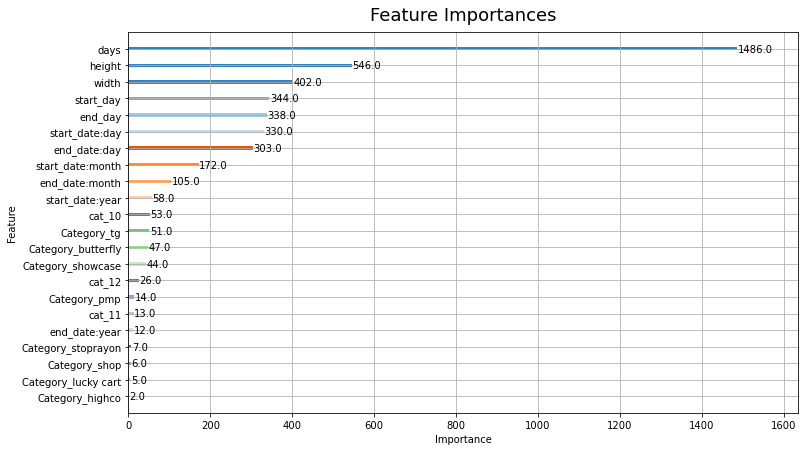

In [57]:
cmap = plt.cm.get_cmap('tab20c_r')
colors = [cmap(i) for i in range(x.shape[1])]
fig, ax = plt.subplots(figsize=(12, 7))
plot_importance(model, ax=ax, color=colors)
plt.title('Feature Importances', fontdict={'fontsize':18}, pad=12)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

x=x.drop('Category_highco',axis=1)
test=test.drop('Category_highco',axis=1)
X_train , X_test , y_train ,y_test = train_test_split(x,y,test_size = 0.1,random_state = 7)

In [58]:
x.head()

,height,width,days,start_day,end_day,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,
8963,200.0,995.0,5.0,7.0,3.0,2019,7,21,2019,7,24,0,0,1,0,0,0,0,0,0,0,0
11875,486.0,278.0,6.0,2.0,6.0,2020,9,1,2020,9,5,0,1,0,1,0,0,0,0,0,0,0
25899,488.0,265.0,28.0,4.0,2.0,2020,10,29,2020,11,24,0,1,0,1,0,0,0,0,0,0,0
25458,150.0,1200.0,8.0,3.0,2.0,2020,12,9,2020,12,15,1,0,0,0,0,0,0,0,0,0,0
35293,200.0,995.0,44.0,4.0,4.0,2019,11,14,2019,12,26,0,0,1,0,0,0,0,0,0,0,0


In [59]:
test.head()

,height,width,days,start_day,end_day,start_date:year,start_date:month,start_date:day,end_date:year,end_date:month,end_date:day,cat_10,cat_11,cat_12,Category_butterfly,Category_highco,Category_lucky cart,Category_pmp,Category_shop,Category_showcase,Category_stoprayon,Category_tg
campaign_id,,,,,,,,,,,,,,,,,,,,,,
126,420.0,574.0,6.0,5.0,2.0,2020,8,28,2020,9,1,1,0,0,1,0,0,0,0,0,0,0
29125,420.0,574.0,28.0,1.0,6.0,2019,7,15,2019,8,10,1,0,0,1,0,0,0,0,0,0,0
740,298.0,398.0,64.0,2.0,1.0,2020,6,30,2020,8,31,0,0,1,1,0,0,0,0,0,0,0
3911,420.0,574.0,14.0,3.0,1.0,2020,7,22,2020,8,3,1,0,0,1,0,0,0,0,0,0,0
33566,298.0,796.0,12.0,2.0,5.0,2021,6,1,2021,6,11,0,0,1,0,0,0,0,0,0,0,1


### Grid Search

In [60]:
xgb_params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300, 400,1000],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1]
}

In [61]:
grid_search = GridSearchCV(model, xgb_params, scoring='neg_root_mean_squared_error', cv=10, n_jobs=-1)

In [62]:
#grid_search.fit(X_train, y_train)

In [63]:
print('Best parameters: ', grid_search.best_params_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
model = XGBRegressor(colsample_bytree=1,learning_rate=0.1, max_depth= 5, n_estimators=10000, subsample= 1,gamma=0,min_child_weight=1,reg_alpha=0,reg_lambda=1,scale_pos_weight=1)
model.fit(X_train,y_train)

In [ ]:
# note that the lower the MSE the better 
y_preds = model.predict(X_test)
rmse = mse(y_test,y_preds)**(1/2)
print(rmse)

# creating the submission

In [ ]:
preds = model.predict(test)

In [ ]:
submission['budget'] = preds

In [ ]:
# this code will generate a file that you should download 
submission.to_csv('ss.csv',index=False)